In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import operator
import numpy as np
import scipy.optimize as optimization

from numpy import arange,array,ones
from scipy import stats

j=1
labels = np.array(["5\u03BCg/ml", "10\u03BCg/ml", "15\u03BCg/ml", "20\u03BCg/ml", "40\u03BCg/ml", "50\u03BCg/ml", "80\u03BCg/ml"])

In [2]:
filename = "Control.csv" # the filename
df = pd.read_csv(filename) # breaking it up into appropriate lists
tmplist = df["Temp"].values.tolist()
yellowcontrol=tmplist[0:6]
bluecontrol=tmplist[6:]

filename = "BlueLarge.csv" # the filename
df = pd.read_csv(filename) # breaking it up into appropriate lists
bluelarge = df["Temperature"].values.tolist()

filename = "YellowLarge.csv" # the filename
df = pd.read_csv(filename) # breaking it up into appropriate lists
yellowlarge = df["Temperature"].values.tolist()

filename = "BlueSmall.csv" # the filename
df = pd.read_csv(filename) # breaking it up into appropriate lists
bluesmall = df["Temperature"].values.tolist()

filename = "YellowSmall.csv" # the filename
df = pd.read_csv(filename) # breaking it up into appropriate lists
yellowsmall = df["Temperature"].values.tolist()

timelist = [30,60,90,120,150,180]

In [3]:
for i in range(int(len(bluelarge)/6)):
    for j in range(6):
        bluelarge[6*i+j]=bluelarge[6*i+j]-bluecontrol[j]
for i in range(int(len(bluesmall)/6)):
    for j in range(6):
        bluesmall[6*i+j]=bluesmall[6*i+j]-bluecontrol[j]

for i in range(int(len(yellowlarge)/6)):
    for j in range(6):
        yellowlarge[6*i+j]=yellowlarge[6*i+j]-yellowcontrol[j]
for i in range(int(len(yellowsmall)/6)):
    for j in range(6):
        yellowsmall[6*i+j]=yellowsmall[6*i+j]-yellowcontrol[j]

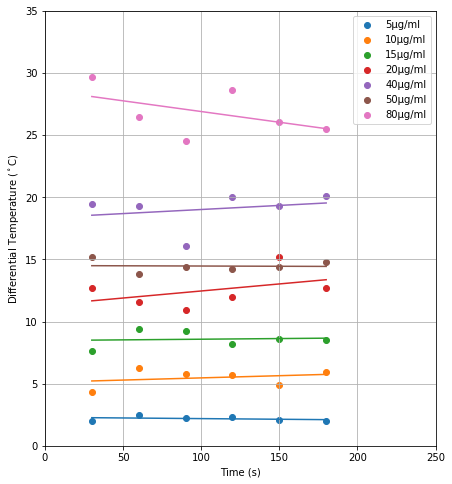

In [4]:
plt.figure(figsize=(7,8))
for i in range(int(len(yellowsmall)/6)):
    plt.scatter(timelist,yellowsmall[6*i:6*(i+1)],label=labels[i])
    slope, intercept, r_value, p_value, std_err = stats.linregress(timelist,yellowsmall[6*i:6*(i+1)])
    point = [30*slope+intercept,180*slope+intercept]
    plt.plot([30,180], point)
        
plt.xlabel("Time (s)")
plt.ylabel("Differential Temperature ($^\circ$C)")
plt.grid()
plt.xlim(0,250)
plt.ylim(0,35)
plt.legend()

# plt.title("Fe$_3$O$_4$ Small Nanoparticles on a Yellow Membrane")

plt.savefig("FeOsmallyellowTimevTemp.png",dpi=300)

plt.show()

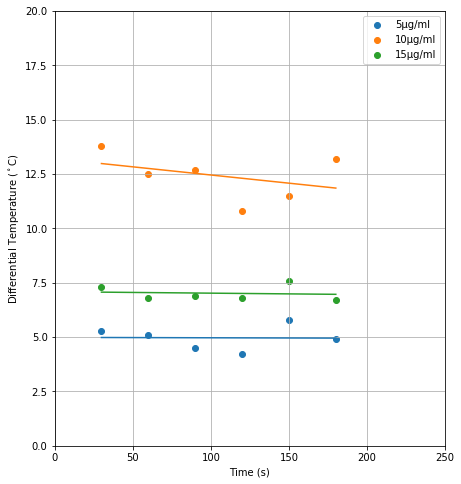

In [5]:
plt.figure(figsize=(7,8))

for i in range(int(len(bluesmall)/6)):
    plt.scatter(timelist,bluesmall[6*i:6*(i+1)],label=labels[i])
    slope, intercept, r_value, p_value, std_err = stats.linregress(timelist,bluesmall[6*i:6*(i+1)])
    point = [30*slope+intercept,180*slope+intercept]
    plt.plot([30,180], point)

plt.grid()

plt.xlabel("Time (s)")
plt.ylabel("Differential Temperature ($^\circ$C)")

plt.xlim(0,250)
plt.ylim(0,20)

plt.legend()

# plt.title("Fe$_3$O$_4$ Small Nanoparticles on a Blue Membrane")

plt.savefig("FeOsmallblueTimevTemp.png",dpi=300)

plt.show()

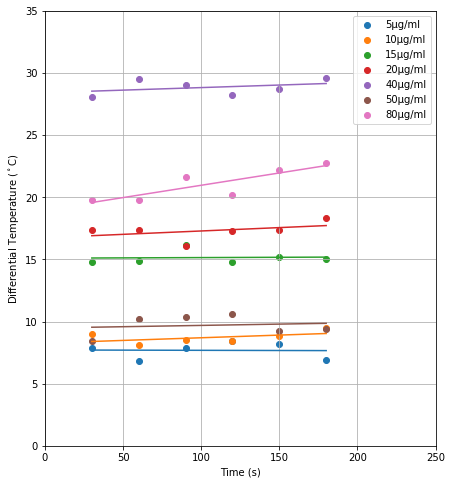

In [6]:
plt.figure(figsize=(7,8))

for i in range(int(len(yellowlarge)/6)):
    plt.scatter(timelist,yellowlarge[6*i:6*(i+1)],label=labels[i])
    slope, intercept, r_value, p_value, std_err = stats.linregress(timelist,yellowlarge[6*i:6*(i+1)])
    point = [30*slope+intercept,180*slope+intercept]
    plt.plot([30,180], point)

plt.grid()

plt.xlabel("Time (s)")
plt.ylabel("Differential Temperature ($^\circ$C)")
plt.legend()
plt.xlim(0,250)
plt.ylim(0,35)

# plt.title("Fe$_3$O$_4$ Large Nanoparticles on a Yellow Membrane")

plt.savefig("FeOlargeyellowTimevTemp.png",dpi=300)

plt.show()

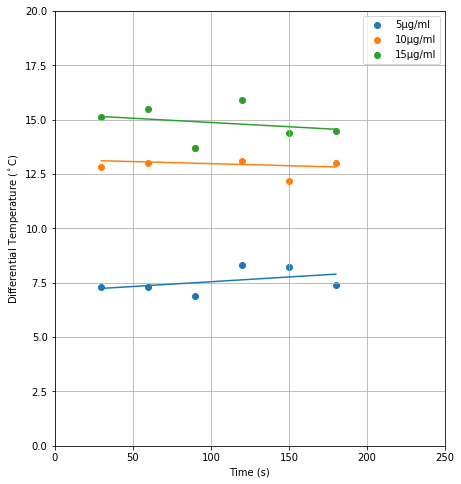

In [7]:
plt.figure(figsize=(7,8))

for i in range(int(len(bluelarge)/6)):
    plt.scatter(timelist,bluelarge[6*i:6*(i+1)],label=labels[i])
    slope, intercept, r_value, p_value, std_err = stats.linregress(timelist,bluelarge[6*i:6*(i+1)])
    point = [30*slope+intercept,180*slope+intercept]
    plt.plot([30,180], point)

plt.grid()

plt.xlabel("Time (s)")
plt.ylabel("Differential Temperature ($^\circ$C)")

plt.xlim(0,250)
plt.ylim(0,20)

plt.legend()

# plt.title("Fe$_3$O$_4$ Large Nanoparticles on a Blue Membrane")

plt.savefig("FeOlargeblueTimevTemp.png",dpi=300)

plt.show()

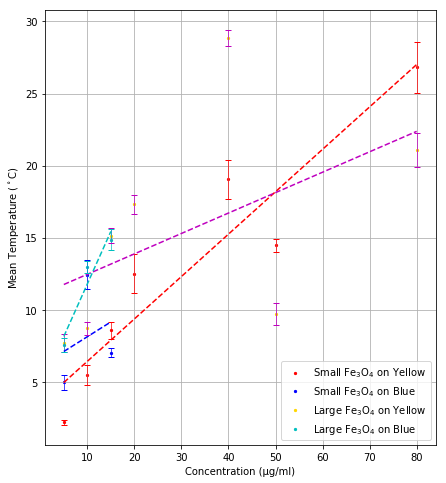

In [8]:
plt.figure(figsize=(7,8))

cap=3
s=5
l=0.7

concs=[5,10,15,20,40,50,80]

# small nanoparticles on yellow

smallyellowavgs=[]
smallyellowstd=[]
for i in range(int(len(yellowsmall)/6)):
    avg=np.mean(yellowsmall[6*i:6*(i+1)])
    std=np.std(yellowsmall[6*i:6*(i+1)])
    smallyellowavgs.append(avg)
    smallyellowstd.append(std)
slopesy, interceptsy, r_value, p_value, std_err = stats.linregress(concs,smallyellowavgs)
point = [5*slopesy+interceptsy,80*slopesy+interceptsy]
plt.plot([5,80], point,color="r",linestyle="--")
plt.scatter(concs,smallyellowavgs,label="Small Fe$_3$O$_4$ on Yellow",color="r",s=s)
plt.errorbar(concs,smallyellowavgs,smallyellowstd,linestyle="none",color="r",elinewidth=l,capsize=cap)

# small nanoparticles on blue

smallblueavgs=[]
smallbluestd=[]
for i in range(int(len(bluesmall)/6)):
    avg=np.mean(bluesmall[6*i:6*(i+1)])
    std=np.std(bluesmall[6*i:6*(i+1)])
    smallblueavgs.append(avg)
    smallbluestd.append(std)
slopesb, interceptsb, r_value, p_value, std_err = stats.linregress(concs[0:3],smallblueavgs)
point = [5*slopesb+interceptsb,15*slopesb+interceptsb]
plt.plot([5,15], point,color="b",linestyle="--")
plt.scatter(concs[0:3],smallblueavgs,label="Small Fe$_3$O$_4$ on Blue",color="b",s=s)
plt.errorbar(concs[0:3],smallblueavgs,smallbluestd,linestyle="none",color="b",elinewidth=l,capsize=cap)

# large nanoparticles on yellow

largeyellowavgs=[]
largeyellowstd=[]
for i in range(int(len(yellowlarge)/6)):
    avg=np.mean(yellowlarge[6*i:6*(i+1)])
    std=np.std(yellowlarge[6*i:6*(i+1)])
    largeyellowavgs.append(avg)
    largeyellowstd.append(std)
slopely, interceptly, r_value, p_value, std_err = stats.linregress(concs,largeyellowavgs)
point = [5*slopely+interceptly,80*slopely+interceptly]
plt.plot([5,80], point,color="m",linestyle="--")
plt.scatter(concs,largeyellowavgs,label="Large Fe$_3$O$_4$ on Yellow",color="gold",s=s)
plt.errorbar(concs,largeyellowavgs,largeyellowstd,color="m",linestyle="none",elinewidth=l,capsize=cap)

# large nanoparticles on blue

largeblueavgs=[]
largebluestd=[]
for i in range(int(len(bluelarge)/6)):
    avg=np.mean(bluelarge[6*i:6*(i+1)])
    std = np.std(bluelarge[6*i:6*(i+1)])
    largeblueavgs.append(avg)
    largebluestd.append(std)
slopelb, interceptlb, r_value, p_value, std_err = stats.linregress(concs[0:3],largeblueavgs)
point = [5*slopelb+interceptlb,15*slopelb+interceptlb]
plt.plot([5,15], point,color="c",linestyle="--")
plt.scatter(concs[0:3],largeblueavgs,label="Large Fe$_3$O$_4$ on Blue",color="c",s=s)
plt.errorbar(concs[0:3],largeblueavgs,largebluestd,color="c",linestyle="none",elinewidth=l,capsize=cap)

plt.grid()
plt.legend()
plt.xlabel("Concentration (\u03BCg/ml)")
plt.ylabel("Mean Temperature ($^\circ$C)")
# plt.title("Concentration vs. Mean Temperature for Fe$_3$O$_4$ on different membranes")

plt.savefig("FeOConcentrationvMeanTemp.png",dpi=300)

plt.show()

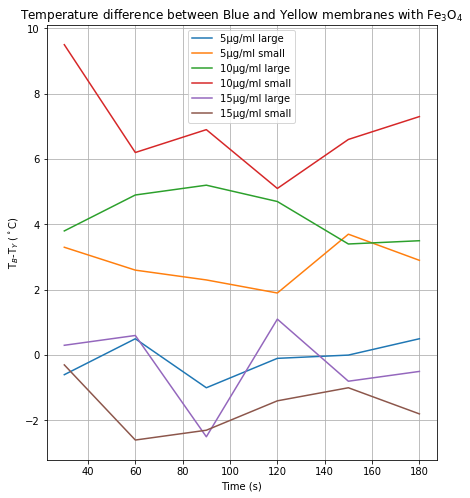

In [9]:
plt.figure(figsize=(7,8))

labels = ["5\u03BCg/ml large","5\u03BCg/ml small","10\u03BCg/ml large","10\u03BCg/ml small","15\u03BCg/ml large","15\u03BCg/ml small"]

for i in range(int(len(bluelarge)/6)):
    diff=np.array(bluelarge[6*i:6*(i+1)])-np.array(yellowlarge[6*i:6*(i+1)])
#     slope, intercept, r_value, p_value, std_err = stats.linregress(timelist,bluelarge[6*i:6*(i+1)])
#     point = [30*slope+intercept,180*slope+intercept]
#     plt.plot([30,180], point)
    plt.plot(timelist,diff,label=labels[2*i])
    
    diff=np.array(bluesmall[6*i:6*(i+1)])-np.array(yellowsmall[6*i:6*(i+1)])
    plt.plot(timelist,diff,label=labels[2*i+1])
plt.xlabel("Time (s)")
plt.ylabel("T$_B$-T$_Y$ ($^\circ$C)")
plt.title("Temperature difference between Blue and Yellow membranes with Fe$_3$O$_4$")
plt.grid()
plt.legend()

plt.savefig("TempDiffFeO.png",dpi=300)

plt.show()

In [10]:
# large yellow
largeyellow=-interceptly/slopely
# small yellow
smallyellow=-interceptsy/slopesy
# large blue
largeblue=-interceptlb/slopelb
# small blue
smallblue=-interceptsb/slopesb
print(largeyellow,smallyellow,largeblue,smallblue)

-78.00244290201245 -11.84842883548983 -6.193745232646832 -29.674796747967438
